# Reinforcement learning models for the dynamic foraging task

In [32]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import multiprocessing as mp
import matplotlib.pyplot as plt

from aind_dynamic_foraging_models.generative_model.bandit_model import BanditModel as Bandit
from aind_dynamic_foraging_models.generative_model.fitting_functions import fit_bandit
from aind_dynamic_foraging_models.util.plot import plot_session_lightweight

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 3000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Set up agent

In [33]:
forager='Hattori2019'
bandit = Bandit(forager=forager, 
                epsilon=0,  
                learn_rate_rew=0.2,
                learn_rate_unrew=0.1,
                forget_rate=0.05, 
                softmax_temperature=0.4, 
                n_trials=n_trials)  

#### Perform the task

In [34]:
bandit.simulate()

choice_history = bandit.choice_history
reward_history = bandit.reward_history
p_reward = bandit.p_reward

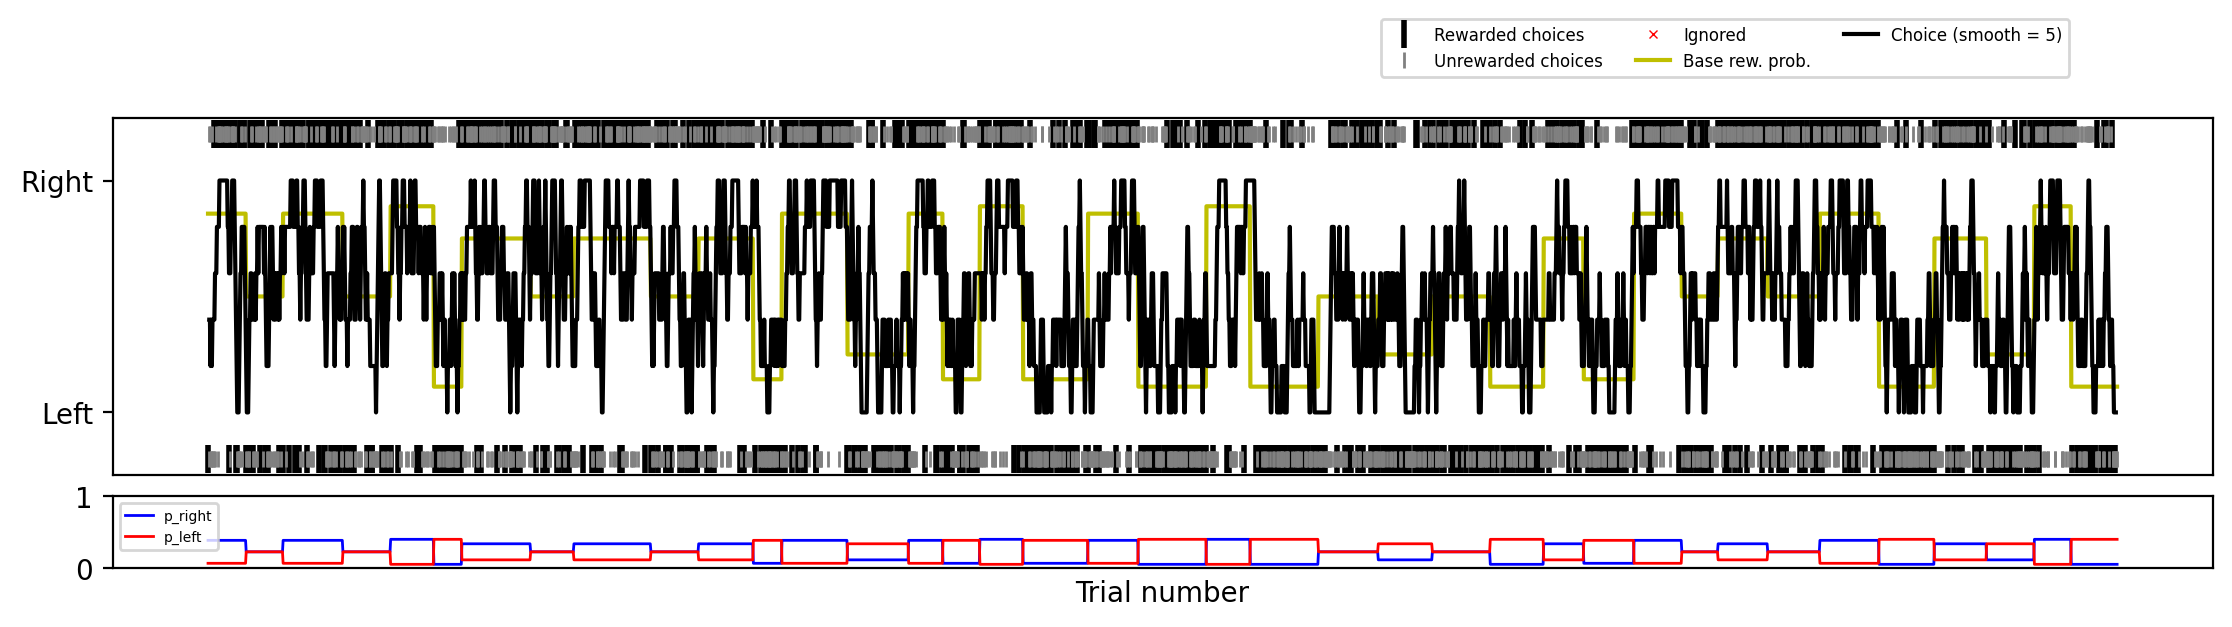

In [35]:
plot_session_lightweight(choice_history=choice_history,
                         reward_history_non_autowater=reward_history,
                         p_reward=p_reward);

#### Parameter recovery

In [ ]:
fitting_result = fit_bandit(forager=forager, 
                            fit_names=['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature', 'biasL'], 
                            fit_bounds=[[0, 0, 0, 1e-2, -5], [1, 1, 1, 15, 5]], 
                            choice_history=choice_history, 
                            reward_history=reward_history,
                            )

In [38]:
fitting_result.x

array([0.21361056, 0.10647478, 0.05508342, 0.40781374, 0.01279148])

The fitted values should be very close to the ground truth

In [43]:
ground_truth = [bandit.learn_rates[1], 
                bandit.learn_rates[0], 
                bandit.forget_rates[0], 
                bandit.softmax_temperature, 
                bandit.bias_terms[0]]
ground_truth

[0.2, 0.1, 0.05, 0.4, 0]

#### Crosscheck with Stefano's refactoring

In [46]:
from aind_dynamic_foraging_models.generative_model.agents import forager_Hattori2019

agent = forager_Hattori2019()
fitting_result = agent.fit_history(choice_history, reward_history)

In [47]:
fitting_result.x

array([0.21361404, 0.10647571, 0.0550848 , 0.40781474, 0.01279138])